# <b><u> Project Title : Book Recommendation System </u></b>

**Project type** - Unsupervised ML

**Contribution** - Individual

Github link - https://github.com/disuja7/Book-Recommendation-System

**Index :**

1. [Introduction & Problem Description](#s1)
2. [Data Description](#s2)
3. [Importing dataset and the libraries](#s3)
4. [Exploratory data analysis(EDA) along with feature engineering](#s4)
5. [Recommendation Systems](#s5)
6. [Evaluation](#s6)
7. [Summary and conclusions](#s7)



<a name="s1"></a>
## <b>1. Introduction & Problem Description </b>

During the last few decades, with the rise
of Youtube, Amazon, Netflix, and many
other such web services, recommender
systems have taken more and more place
in our lives. From e-commerce (suggest to
buyers articles that could interest them)
to online advertisement (suggest to users
the right contents, matching their
preferences), recommender systems are
today unavoidable in our daily online
journeys.
In a very general way, recommender
systems are algorithms aimed at
suggesting relevant.
items to users (items being movies to
watch, text to read, products to buy, or
anything else depending on industries).
Recommender systems are really critical
in some industries as they can generate a
huge amount of income when they are
efficient or also be a way to stand out
significantly from competitors. The main
objective is to create a book
recommendation system for users.

### **Businees Goal**
We are required to do basic EDA on the given data for the Amazon web services and analyse some insights from it.
Finally we have to use recommendation system to recommend the unexplored books to the users.

<a name="s2"></a>
## <b>2. Data Description </b>


**The Book-Crossing dataset comprises 3
files.**

**Users:**
Contains the users. Note that user IDs
(User-ID) have been anonymized and map
to integers. Demographic data is provided
(Location, Age) if available. Otherwise,
these fields contain NULL values.

**Books:**
Books are identified by their respective
ISBN. Invalid ISBNs have already been
removed from the dataset. Moreover,
some content-based information is given
(Book-Title, Book-Author, Year-OfPublication, Publisher), obtained from
Amazon Web Services. Note that in the
case of several authors, only the first is
provided. URLs linking to cover images are
also given, appearing in three different
flavours (Image-URL-S, Image-URL-M,
Image-URL-L), i.e., small, medium, large.
These URLs point to the Amazon website.

**Ratings:**
Contains the book rating information.
Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher
values denoting higher appreciation).

<a name="s3"></a>
## <b>3.Importing dataset and the libraries </b>

In [205]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing Datasets**

In [207]:
users_df = pd.read_csv("/content/drive/MyDrive/DATA/Copy of Users.csv")

In [208]:
books_df = pd.read_csv("/content/drive/MyDrive/DATA/Copy of Books.csv")

In [209]:
ratings_df = pd.read_csv("/content/drive/MyDrive/DATA/Copy of Ratings.csv")

<a name="s4"></a>
## <b>4.Exploratory data analysis (EDA) along with feature engineering</b>

### **User Dataset**

In [210]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [211]:
users_df= users_df[~(users_df['User-ID']==193560)]

In [212]:
users_df.shape

(278857, 3)

In [213]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278857 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278857 non-null  int64  
 1   Location  278857 non-null  object 
 2   Age       168095 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.5+ MB


In [214]:
users_df.describe(include='all')

,User-ID,Location,Age
count,278857.000000,278857,168095.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.305884,NaN,34.751420
std,80499.594094,NaN,14.428139
min,1.000000,NaN,0.000000
25%,69715.000000,NaN,24.000000
50%,139429.000000,NaN,32.000000
75%,209144.000000,NaN,44.000000


In [215]:
# checking for null values
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [216]:
# checking for duplicate
len(users_df[users_df.duplicated()])

0

**Age distributionn of users**

In [217]:
# Describing 'Age' column
users_df['Age'].describe()

count    168095.000000
mean         34.751420
std          14.428139
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

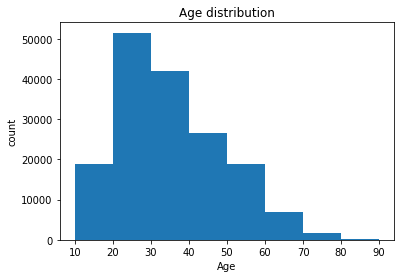

In [218]:
# histogram plot for age distribution
plt.hist(users_df['Age'], bins=[10,20,30,40,50,60,70,80,90])
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age distribution')
plt.show()

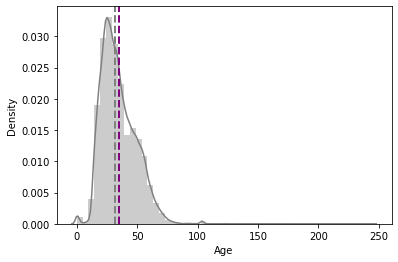

In [219]:
# Plotting the distribution of Age of users
sns.distplot(users_df['Age'],color = 'grey')
plt.axvline((users_df['Age']).median(), color='grey', linestyle='dashed', linewidth=2)
plt.axvline((users_df['Age']).mean(), color='purple', linestyle='dashed', linewidth=2)
plt.show()

**User's Location distribution**

In [220]:
# Deriving a new feature 'Country' from 'Location'
users_df['Country'] =  users_df.apply(lambda row: row['Location'].split()[-1],axis=1)

In [221]:
users_df.head()

,User-ID,Location,Age,Country
0,1,"nyc, new york, usa",NaN,usa
1,2,"stockton, california, usa",18.0,usa
2,3,"moscow, yukon territory, russia",NaN,russia
3,4,"porto, v.n.gaia, portugal",17.0,portugal
4,5,"farnborough, hants, united kingdom",NaN,kingdom


In [222]:
# Unique Countries and their count 
users_df['Country'].value_counts().head(10)

usa          139713
canada        21662
kingdom       18538
germany       17043
spain         13148
australia     11784
italy         11266
france         3489
portugal       3325
zealand        3097
Name: Country, dtype: int64

In [223]:
# Total unique coutries availlable
len(users_df['Country'].unique())

1066

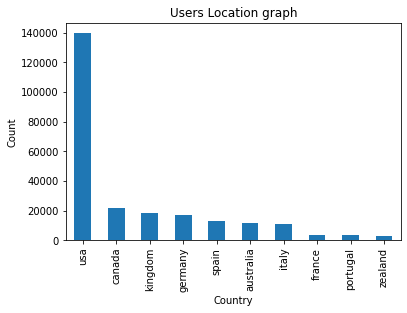

In [224]:
# Plotting the counts of top 10 countries
users_df['Country'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Users Location graph')
plt.show()

### **Books Dataset**

In [225]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [226]:
books_df.shape

(271360, 8)

In [227]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [228]:
# checking for null values
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [229]:
# dropping null values
books_df.dropna(inplace=True)

In [230]:
# checking for duplicates
books_df.duplicated().sum()

0

In [231]:
# total unique books
len(books_df['Book-Title'].unique())

242130

In [232]:
# changing column name 'ISBN' to 'Book_ID'
books_df.rename(columns={'ISBN':'Book_ID'},inplace=True)

In [233]:
# changing the datatype of feature 'Year-Of-Publication' from object to int
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('int32')

In [234]:
year_count_df = books_df.groupby('Year-Of-Publication')['Book_ID'].count().reset_index(name='total_publications')

In [235]:
year_count_df.head()

,Year-Of-Publication,total_publications
0,0,4618
1,1376,1
2,1378,1
3,1806,1
4,1897,1


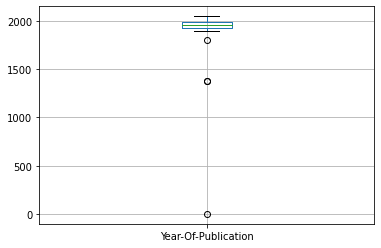

In [236]:
# checking for outlier
year_count_df.boxplot(column='Year-Of-Publication')

In [237]:
# finding IQR
Q1 = np.percentile(year_count_df['Year-Of-Publication'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(year_count_df['Year-Of-Publication'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [238]:
# upper and lower bound
upper = np.where(year_count_df['Year-Of-Publication'] >= 2023)
lower = np.where(year_count_df['Year-Of-Publication'] <= (Q1-1.5*IQR))

In [239]:
# removing outliers
year_count_df.drop(upper[0], inplace = True)
year_count_df.drop(lower[0], inplace = True)

In [240]:
year_count_df.value_counts()

Year-Of-Publication  total_publications
1897                 1                     1
1986                 5841                  1
1984                 4986                  1
1983                 4499                  1
1982                 4197                  1
                                          ..
1939                 9                     1
1938                 7                     1
1937                 5                     1
1936                 7                     1
2021                 1                     1
Length: 106, dtype: int64

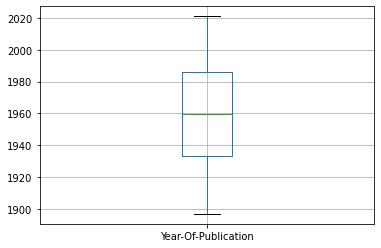

In [241]:
year_count_df.boxplot(column='Year-Of-Publication')

**Trend in the publishing of books per year**

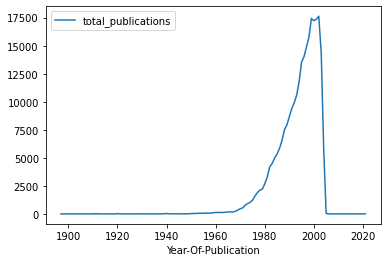

In [242]:
# Ploting the trend
year_count_df.plot(x='Year-Of-Publication',y='total_publications',kind='line')

### **Rating Dataset**

In [243]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [244]:
ratings_df= ratings_df[~(ratings_df['User-ID']==193560)]

In [245]:
ratings_df.shape

(1148931, 3)

In [246]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148931 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1148931 non-null  int64 
 1   ISBN         1148931 non-null  object
 2   Book-Rating  1148931 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 35.1+ MB


In [247]:
# Unique ratings and their count
ratings_df['Book-Rating'].value_counts()

0     715671
8     103587
10     78574
7      76396
9      67403
5      50968
6      36906
4       8901
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [248]:
# Total number of unique users
len(ratings_df['User-ID'].unique())

105282

In [249]:
# rename the column
ratings_df.rename(columns={'ISBN':'Book_ID'},inplace=True)

In [250]:
ratings_df.head()

,User-ID,Book_ID,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**Top 10 Authors with maximumm books published and their average rating**

In [251]:
# merging books_df and ratings_df
books_with_ratings = books_df.merge(ratings_df,on='Book_ID')
books_with_ratings.head()

,Book_ID,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [252]:
# using groupby to count total books by each Author and finding mean of ratings of each Author
book_count = books_with_ratings.groupby(['Book-Author'])['Book-Title'].count().reset_index()
avg_rating = books_with_ratings.groupby(['Book-Author'])['Book-Rating'].mean().reset_index()
top_authors_df = book_count.merge(avg_rating,on='Book-Author')

In [253]:
# creating a new dataframe containing Top authors
top_authors_df.rename(columns={'Book-Rating':'Avg_Rating','Book-Title':'Books_published'},inplace=True)
top_authors_df=top_authors_df.sort_values(by='Books_published',ascending=False).head(10)
top_authors_df

,Book-Author,Books_published,Avg_Rating
90746,Stephen King,10053,3.606287
72979,Nora Roberts,8429,2.659390
48732,John Grisham,6010,3.192013
42769,James Patterson,5845,3.143713
66094,Mary Higgins Clark,4776,2.634631
21417,Dean R. Koontz,4313,2.589613
95702,Tom Clancy,4036,2.221754
19253,Danielle Steel,3726,2.079442
91759,Sue Grafton,3457,2.758750
43784,Janet Evanovich,3350,3.533731


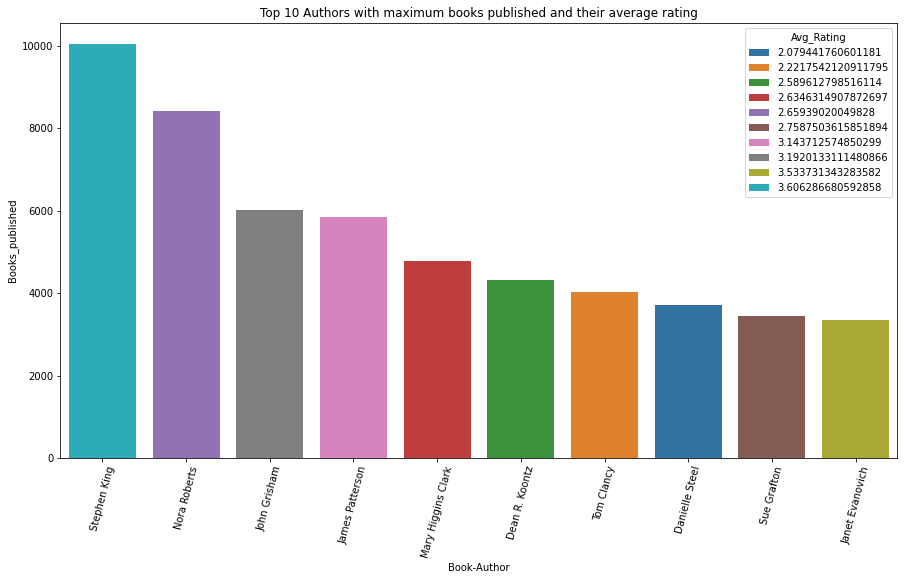

In [254]:
# Ploting the top Authors with the number of books published and their average rating
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=top_authors_df,x='Book-Author',y='Books_published',hue='Avg_Rating',dodge=False)
plt.xticks(rotation=75)
plt.title('Top 10 Authors with maximum books published and their average rating')
plt.show()

**Top 10 Publishers**

In [255]:
# using groupby to count total books by each Publisher and finding mean of ratings of each Publisher
book_count = books_with_ratings.groupby(['Publisher'])['Book-Title'].count().reset_index()
avg_rating = books_with_ratings.groupby(['Publisher'])['Book-Rating'].mean().reset_index()
top_publishers_df = book_count.merge(avg_rating,on='Publisher')

In [256]:
# creating a new dataframe containing Top publishers
top_publishers_df.rename(columns={'Book-Rating':'Avg_Rating','Book-Title':'Books_published'},inplace=True)
top_publishers_df=top_publishers_df.sort_values(by='Books_published',ascending=False).head(10)
top_publishers_df

,Publisher,Books_published,Avg_Rating
1387,Ballantine Books,34723,2.801054
11700,Pocket,31987,2.498828
1713,Berkley Publishing Group,28614,2.424827
15851,Warner Books,25504,2.671503
6550,Harlequin,25027,1.439925
1417,Bantam Books,23596,2.327598
1413,Bantam,20007,2.877193
13584,Signet Book,19155,2.684991
1246,Avon,17352,2.447499
11329,Penguin Books,17032,3.203499


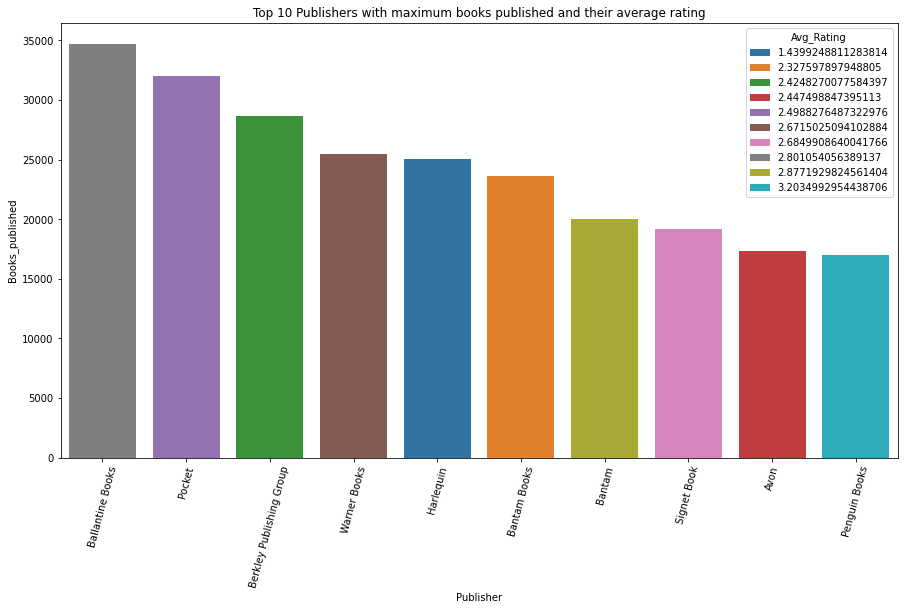

In [257]:
# Ploting the top Publishers with the number of books published and their average rating
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=top_publishers_df,x='Publisher',y='Books_published',hue='Avg_Rating',dodge=False)
plt.xticks(rotation=75)
plt.title('Top 10 Publishers with maximum books published and their average rating')
plt.show()



---



---



<a name="s5"></a>
## <b>5.Recommendation Systems</b>

### **Let's Build a Popularity based Recommendations**

In [258]:
books_with_ratings.head()

,Book_ID,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [259]:
# Couting the number of ratings for each book
rating_count = books_with_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index(name='Rating_count')
rating_count.head()

,Book-Title,Rating_count
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [260]:
# Calculating average rating of users for each book
avg_rating = books_with_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index(name='Avg_rating')
avg_rating.head()

,Book-Title,Avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


**Merging above two datasets**

In [261]:
# merging popular_df with avg_rating
popular_df = rating_count.merge(avg_rating,on='Book-Title')
popular_df.head()

,Book-Title,Rating_count,Avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


**Taking only those books having Rating_count > 250 and sorting them on the basis of Avg_rating.**

In [262]:
# Filtering the books by rating count # min rating_count = 250
print(popular_df.shape)
popular_df =  popular_df[popular_df['Rating_count']>=100].sort_values('Avg_rating',ascending=False).head(20)
popular_df = popular_df.merge(books_df,on='Book-Title').drop_duplicates('Book-Title')
print(popular_df.shape)

(240931, 3)
(20, 10)


In [263]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [264]:
import pickle
pickle.dump(popular_df, open('popular_df.pkl','wb'))

**Here 'popular_df' is the dataset which contains top 20 books which is most popular and it can be recommended to any user as a general recommendation on the home page of plateform.**



---



---



### **Collaborative Filtering Based Recommender System**

In [265]:
books_with_ratings.head()

,Book_ID,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


**Multiple users has rated the same books and the same users have rated multiple books. So we will consider only those users who has rated more than 200 books and only those books which is rated by more than 50 users.**




In [266]:
# Users who have rated more than 200 books
x=books_with_ratings['User-ID'].value_counts()>200

In [267]:
x[x].shape

(810,)

In [268]:
y=x[x].index

In [269]:
filtered_ratings=books_with_ratings[books_with_ratings['User-ID'].isin(y)]

In [270]:
filtered_ratings = filtered_ratings[['Book_ID','Book-Title','Book-Author','Publisher','User-ID','Book-Rating']]

In [271]:
filtered_ratings.head()

,Book_ID,Book-Title,Book-Author,Publisher,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,11676,8
6,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,85526,0
7,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,96054,0
10,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,177458,0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux,110912,10


In [272]:
print(books_with_ratings.shape)
print(filtered_ratings.shape)

(1030803, 10)
(473677, 6)


In [273]:
# counting the number of rating for each book
rating_count=filtered_ratings.groupby('Book-Title')['Book-Rating'].count().reset_index(name='rating_count')

In [274]:
rating_count.head()

,Book-Title,rating_count
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [275]:
# Books which have been rated more than 50 times.
rating_count=rating_count[rating_count['rating_count']>=50] 

In [276]:
rating_count.shape

(706, 2)

In [277]:
# Merging the above two datasets
final_rating = filtered_ratings.merge(rating_count,on='Book-Title') 

In [278]:
print(filtered_ratings.shape)
print(final_rating.shape)

(473677, 6)
(58585, 7)




---



---





---



---



In [279]:
final_rating.head()

,Book_ID,Book-Title,Book-Author,Publisher,User-ID,Book-Rating,rating_count
0,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,11676,9,109
1,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,36836,0,109
2,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,46398,9,109
3,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,113270,0,109
4,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,113519,0,109


In [289]:
pickle.dump(books_df,open('books_df.pkl','wb'))

In [280]:
pickle.dump(final_rating,open('final_rating.pkl','wb'))

### **Memory based Approach**

**Data Preprocessing**

In [281]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = final_rating.pivot_table(index='Book-Title', 
                                                          columns='User-ID', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Using Item similarity**

In [282]:
# importing cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

In [283]:
# getting similarity score
similarity_scores = cosine_similarity(users_items_pivot_matrix_df)

In [284]:
similarity_scores.shape

(706, 706)

In [285]:
# # Defining the recommendation function
# def recommend(book_name):
#   #serach index
#   index = np.where(users_items_pivot_matrix_df.index==book_name)[0][0]
#   similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
#   for i in similar_items:
#     print(users_items_pivot_matrix_df.index[i[0]])


In [286]:
# Defining the recommendation function
def recommend(book_name):
  #serach index
  index = np.where(users_items_pivot_matrix_df.index==book_name)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]
  data = []
  for i in similar_items:
    item = []
    temp_df = books_df[books_df['Book-Title'] == users_items_pivot_matrix_df.index[i[0]]]
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

    data.append(item)
  return data



In [287]:
# Recommending books based on a book user has interacted
recommend('The Notebook')

[['A Walk to Remember',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446608955.01.MZZZZZZZ.jpg'],
 ['The Rescue',
  'Nicholas Sparks',
  'http://images.amazon.com/images/P/0446610399.01.MZZZZZZZ.jpg'],
 ['One Door Away from Heaven',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0553582755.01.MZZZZZZZ.jpg'],
 ['Toxin',
  'Robin Cook',
  'http://images.amazon.com/images/P/0425166619.01.MZZZZZZZ.jpg'],
 ['The Five People You Meet in Heaven',
  'Mitch Albom',
  'http://images.amazon.com/images/P/0786868716.01.MZZZZZZZ.jpg']]

### **Pickling the model for deployment**

In [170]:
import pickle

In [288]:
pickle.dump(recommend,open('recommend.pkl','wb'))

In [172]:
pickled_model = pickle.load(open('recommend.pkl','rb'))

In [174]:
pickled_model('The Notebook')

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven




---



---



### **Model Based Approach**

**Data Preprocessing**

In [175]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = final_rating.pivot_table(index='User-ID', 
                                                          columns='Book-Title', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
# getting the matrix of values only
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 10., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  9.,  0., ...,  0.,  0.,  0.]])

In [177]:
# creating user id list
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[254, 2276, 2766, 2977, 3363, 4017, 4385, 6251, 6323, 6543]

In [178]:
# importing SVD and applying  it.
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [179]:
users_items_pivot_matrix.shape

(809, 706)

In [180]:
U.shape

(809, 15)

In [181]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [182]:
Vt.shape

(15, 706)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [183]:
# getting reconstructed matrix
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 0.51870833, -0.60318408, -0.29796546, ...,  0.43156262,
        -0.02501856,  0.05298749],
       [ 0.30708854,  0.40610602,  0.97001756, ...,  0.09289204,
        -0.05255332,  0.20447403],
       [ 0.01672626,  0.04955678, -0.46496553, ...,  0.23585999,
         0.07188391,  0.38886636],
       ...,
       [ 0.86155908,  0.7244447 ,  0.13974719, ...,  0.16724959,
         0.42471855,  0.03447933],
       [ 0.04345864,  0.41249218,  0.32593942, ..., -0.09724911,
         0.13124313, -0.00604095],
       [-0.08786696,  0.07358006,  0.11340908, ...,  0.2539466 ,
         0.05139359,  0.04038579]])

In [184]:
all_user_predicted_ratings.shape

(809, 706)

In [185]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.518708,0.307089,0.016726,0.233106,0.011097,0.701651,0.123131,1.169627,0.150669,0.193315,...,1.484569,0.620258,0.498412,0.754690,-0.815815,0.418352,0.020761,0.861559,0.043459,-0.087867
1st to Die: A Novel,-0.603184,0.406106,0.049557,0.084754,0.138683,0.206229,0.101902,0.097855,0.406887,0.498843,...,0.646865,0.774355,0.515429,-1.202486,1.399385,0.684564,-0.275852,0.724445,0.412492,0.073580
2nd Chance,-0.297965,0.970018,-0.464966,-0.109537,-0.217782,-0.658429,0.136967,0.905887,0.315625,0.886478,...,0.322522,0.285264,1.057030,-0.223800,0.971180,0.861125,-0.013250,0.139747,0.325939,0.113409
4 Blondes,0.067439,0.014798,0.165928,0.037298,0.016233,0.440458,0.001993,0.092065,0.016141,0.183585,...,0.259359,0.113589,0.118134,-0.179770,0.082866,0.000174,0.139951,0.003898,0.036772,0.005394
A Bend in the Road,0.086382,0.217338,0.078476,0.143920,0.082681,0.231692,0.013929,0.215360,0.007434,0.281335,...,0.271930,0.315516,0.031901,-0.655232,-0.583048,0.359204,0.113422,0.117075,0.009259,0.049902


In [186]:
len(cf_preds_df.columns)

809

In [187]:
books_df.head()

,Book_ID,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [188]:
# Creating a class CFRecommender containing all the required function to recommend
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['Book-Title'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'Book-Title', 
                                                          right_on = 'Book-Title')[['recStrength', 'Book_ID', 'Book-Title', 'Book-Author', 'Image-URL-M']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, books_df)

In [196]:
cf_recommender_model.recommend_items(11676)

,Book-Title,recStrength
0,The Secret Garden,11.629632
1,The Hot Zone,11.450216
2,A Wrinkle in Time,11.263950
3,Cruel &amp; Unusual (Kay Scarpetta Mysteries (...,11.253019
4,Where the Heart Is (Oprah's Book Club (Paperba...,11.176646
5,"The Return of the King (The Lord of the Rings,...",10.977082
6,What Looks Like Crazy On An Ordinary Day,10.907245
7,The Sweet Potato Queens' Book of Love,10.875449
8,Me Talk Pretty One Day,10.831956
9,Confessions of a Shopaholic (Summer Display Op...,10.733114


<a name="s5"></a>
## <b>6.Evaluation</b>

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with **Top-N accuracy metrics**, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.

**This evaluation method works as follows:**

*  For each user
    *  For each item the user has interacted in test set
        *  Sample 100 other items the user has never interacted.   
        *  Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
        *  Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

In [189]:
final_rating.head()

,Book_ID,Book-Title,Book-Author,Publisher,User-ID,Book-Rating,rating_count
0,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,11676,9,109
1,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,36836,0,109
2,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,46398,9,109
3,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,113270,0,109
4,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,113519,0,109


In [190]:
# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
interactions_train_df, interactions_test_df = train_test_split(final_rating,
                                   stratify=final_rating['Book-Title'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 46868
# interactions on Test set: 11717


In [191]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_df = final_rating.set_index('User-ID')
interactions_train_df = interactions_train_df.set_index('User-ID')
interactions_test_df = interactions_test_df.set_index('User-ID')

In [192]:
interactions_full_df.head()

,Book_ID,Book-Title,Book-Author,Publisher,Book-Rating,rating_count
User-ID,,,,,,
11676,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,9,109
36836,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,0,109
46398,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,9,109
113270,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,0,109
113519,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,0,109


The Top-N accuracy metric choosen was **Recall@N** which evaluates whether the interacted item is among the top N items (hit) in the ranked list of 101 recommendations for a user.

In [193]:
# defining a function to get interacted items of a particular user
def get_items_interacted(person_id, interactions_df):
    interacted_items = interactions_df.loc[person_id]['Book-Title']
    return set(interacted_items)

In [194]:
#Top-N accuracy metrics consts
import random
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, interactions_full_df)
        all_items = set(books_df['Book-Title'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_df.loc[person_id]
        
        
        person_interacted_items_testset = set(interacted_values_testset['Book-Title'])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 


        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_df),topn=10000000000)


        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=30)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['Book-Title'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['Book-Title'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['_person_id'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
  
model_evaluator = ModelEvaluator()    

In [195]:
# getting the results
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print(f'\nGlobal metrics:\n%s{cf_global_metrics}')
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
792 users processed

Global metrics:
%s{'modelName': 'Collaborative Filtering', 'recall@5': 0.9221812698944547, 'recall@10': 0.9221812698944547}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,_person_id
88,86,86,173,0.497110,0.497110,11676
85,82,82,100,0.820000,0.820000,35859
46,67,67,73,0.917808,0.917808,16795
25,64,64,72,0.888889,0.888889,230522
86,66,66,70,0.942857,0.942857,76352
229,55,55,69,0.797101,0.797101,185233
17,64,64,69,0.927536,0.927536,102967
214,62,62,64,0.968750,0.968750,78783
205,57,57,63,0.904762,0.904762,52584
24,53,53,62,0.854839,0.854839,198711


Evaluating the Collaborative Filtering model (SVD matrix factorization), we observe that we got **Recall@5 (92%)** and **Recall@10 (92%)** which is a quite good result.

<a name="s7"></a>
## <b>7.Summary and conclusions</b>

**1. After importing and analyzing the data, following insights were observed-**


* The age distribution of users are approximately normal having median age as 32.

* The top 5 coutries from where the users belong are - USA, Canada, Kingdom, Germany and Spain, followed by Autralia and Italy.

* There is an exponential growth in the publication of books from 1970 to 2000.

* The top 5 Authors having most book published are Stephen King, Nora Roberts, John Grisham, James Patterson and	Mary Higgins Clark.

* The top 5 Publishers having most book published are Ballantine Books,	Pocket,	Berkley Publishing Group,	Warner Books and	Harlequin.

**2. The recommendation Systems we used are -** 

* Popularity based recommendations
* Collaborative filtering recommendation system - 
                              1. Memory based approach
                              2. Model based approach
* The model based approach got **Recall@5** = (92%) and also **Recall@10** = (92%) .
